# THE SPARKS FOUNDATION
## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP JAN21
### TASK 5: EXPLORATORY DATA  ANALYSIS - SPORTS
#### QUESTION : Perform EDA on the given dataset and as a sports analyst , find out the most successful teams , players and factors contributing win or loss of a team . Also , suggest teams , or players a company should endorse for its products.
### NAME : CHIRANTHANA R R

## IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING DATASETS

In [2]:
df1=pd.read_csv("matches.csv")
df2=pd.read_csv("deliveries.csv")

## DATA INSIGHTS

In [3]:
df1.shape

(756, 18)

In [4]:
df2.shape

(179078, 21)

In [5]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
df2.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [7]:
##droping unrequired columns
df1.drop(['umpire1', 'umpire2', 'umpire3'], axis=1, inplace=True)

In [8]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [9]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
### CHECKING FOR MISSING VALUES
df1.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [11]:
missing_values_count=df2.isnull().sum()

In [12]:
total_cells = np.product(df2.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

13.644440118937265


In [13]:
df1.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
dtype: int64

##### 1) NUMBER OF SEASONS = 12
##### 2) TOTAL NUMBER OF TEAMS = 15
##### 3) 31 CITIES, 41 DIFFERENT STADIUMS WHERE IPL WAS CONDUCTED

In [14]:
df2.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

##### TOTAL BATSMAN = 516
##### TOTAL BOWLERS = 405
##### TOTAL FIELDERS = 499

In [15]:
df1.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [16]:
df2.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [17]:
df1['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Cuttack             7
Cape Town           7
Ranchi              7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

##### MAXIMUM NUMBER OF GAMES WERE HELD AT MUMBAI 
##### WE NOTICE THAT BANGALORE AND BENGALURU ARE SAME SO WE WILL RECTIFY THE ERROR

In [18]:
df1.replace(to_replace='Bengaluru',value='Bangalore',inplace=True)
df1['city'].value_counts()

Mumbai            101
Bangalore          80
Kolkata            77
Delhi              74
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Cuttack             7
Cape Town           7
Ranchi              7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

##### BANGLORE IS THE SECOND CITY AFTER MUMBAI WERE A LOT OF IPL MATCHES WERE HELD

In [19]:
df1['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [20]:
df1.replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)
df1.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

#### MUMBAI INDIANS HAVE PLAYED THE MOST NUMBER OF MATCHES

In [21]:
# venue where max matches held
max_venue=df1['venue'].value_counts().reset_index()
max_venue

,index,venue
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


##### Eden Gardens,	Wankhede Stadium and M Chinnaswamy Stadium were the top 3 stadiums were most ipl matches were held

In [22]:
seasons=df1.sort_values(by='season')
seasons['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019], dtype=int64)

##### This dataset contains ipl sesasons from 2008-2019

In [23]:
winner_count=df1.winner.value_counts()
winner_count

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

##### MUMBAI INDIANS has won the maximum number of matches followed by CSK , KKR and RCB

In [24]:
most_tossWinner=df1['toss_winner'].value_counts()
most_tossWinner

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

##### WE CAN SEE THE TOSS WINNERS GOT A CLEAR CHANCE IN WINNING 

Text(0.5, 1.0, 'percentage of toss decision by a toss winner')

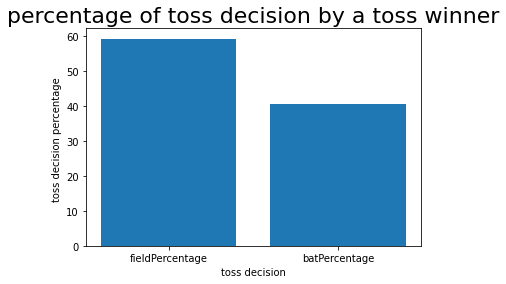

In [25]:
tossdecision=df1['toss_decision'].value_counts().reset_index()

fieldPercentage=(tossdecision.loc[tossdecision['index']=='field','toss_decision']/tossdecision['toss_decision'].sum())*100
batPercentage=(tossdecision.loc[tossdecision['index']=='bat','toss_decision']/tossdecision['toss_decision'].sum())*100
pos=['fieldPercentage','batPercentage']

plt.bar(pos,(59.33908,40.66092))
plt.xlabel('toss decision',)
plt.ylabel('toss decision percentage ')
plt.title('percentage of toss decision by a toss winner', fontsize=22)

#### A GREATER PERCENTAGE OF TEAMS CHOOSE TO FIELD FIRST.

field    0.659033
bat      0.340967
Name: toss_decision, dtype: float64

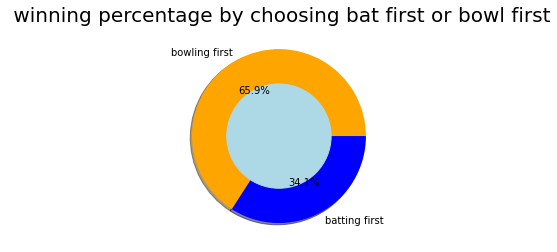

In [26]:
df1.head()
match=df1[['toss_winner','toss_decision','winner']]   # select only 3 columns
winner=match[match['toss_winner']==match['winner']]   #to know which toss_winner became winner

winnerdf=winner['toss_decision'].value_counts()/winner.shape[0] # to know the %of winning by teams on bat first or bowl first

labels=['bowling first','batting first']
plt.pie(winnerdf,labels=labels,autopct='%1.1f%%',shadow=True,colors = ["orange","blue"])
plt.ylabel("")
plt.title(' winning percentage by choosing bat first or bowl first', size=20)
circ = plt.Circle((0,0),.6,color = "lightblue")
plt.gca().add_artist(circ)
winnerdf

##### IN MUCH DETAILED ANALYSIS , 65.9% CHOOSE TO BOWL FIRST WHEREAS 34.2% CHOOSE TO BAT FIRST.

C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


False    48.015873
True     51.984127
dtype: float64

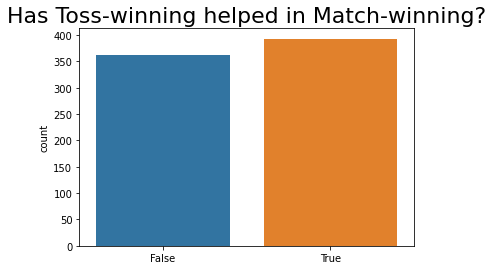

In [27]:
tossWinner=df1['toss_winner']==df1['winner']
(tossWinner.groupby(tossWinner).size()/tossWinner.count())*100
sns.countplot(tossWinner)
plt.title('Has Toss-winning helped in Match-winning?',fontsize=22)
(tossWinner.groupby(tossWinner).size()/tossWinner.count())*100

#### NOT BY GREATER PERCENTAGE , BUT STILL WINNING TOSS DOES PLAY A MINOR ROLE IN TEAM WINNING AS THEY GET A LUCKY CHANCE TO CHOOSE THEIR TEAM STRENGTH AND PLAY AGAINST OPPPONENT'S WEAKNESS

C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


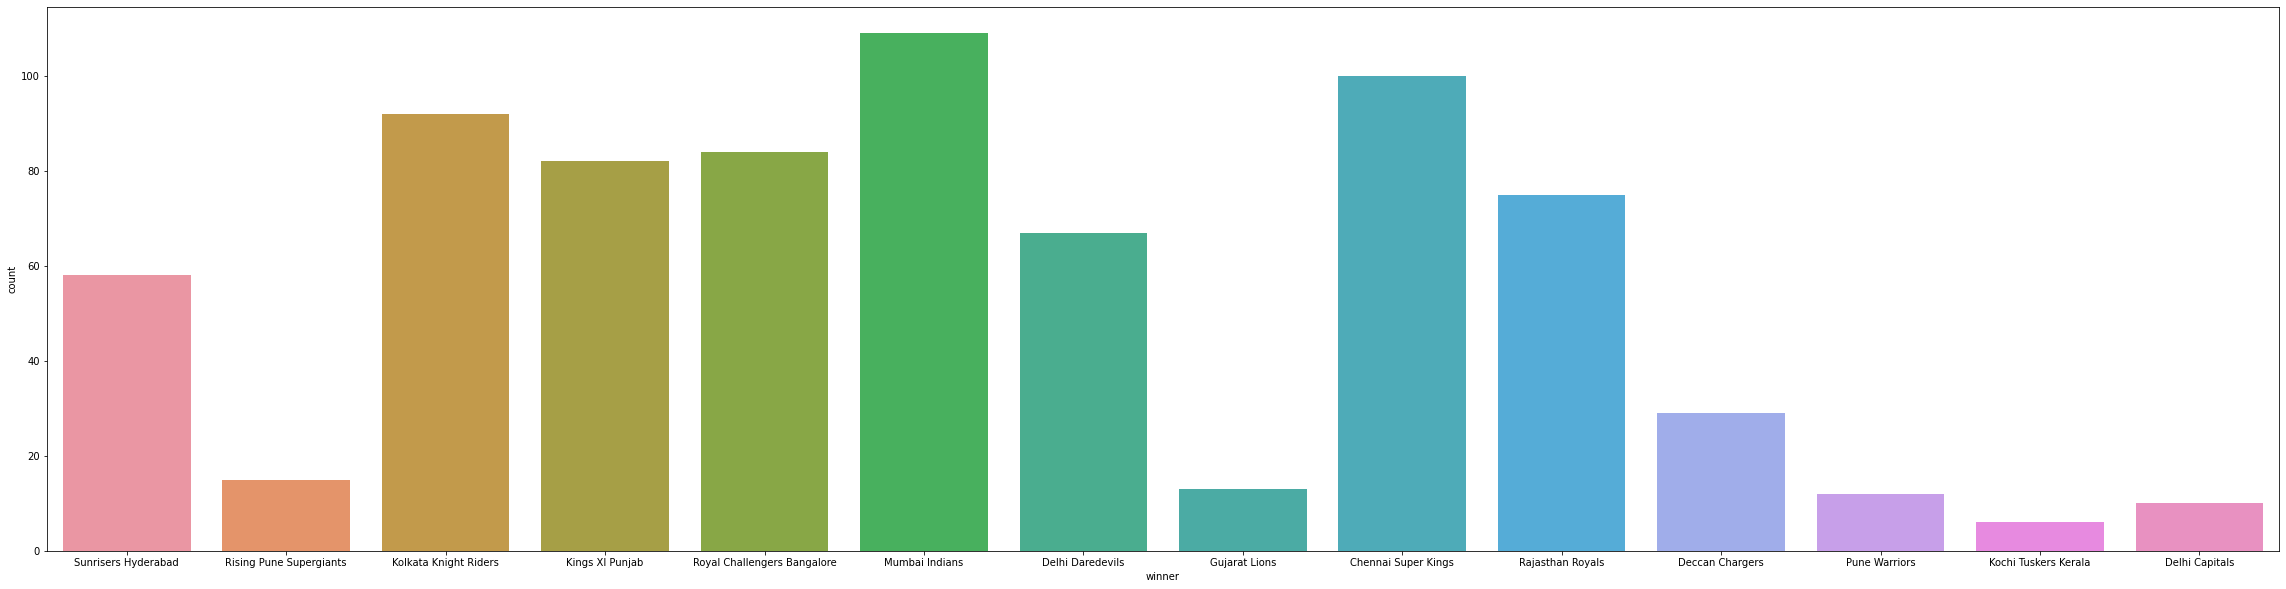

In [28]:
# visualize the target variable
g = sns.countplot(df1['winner'])
plt.gcf().set_size_inches(40, 10)
plt.show()


C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance;

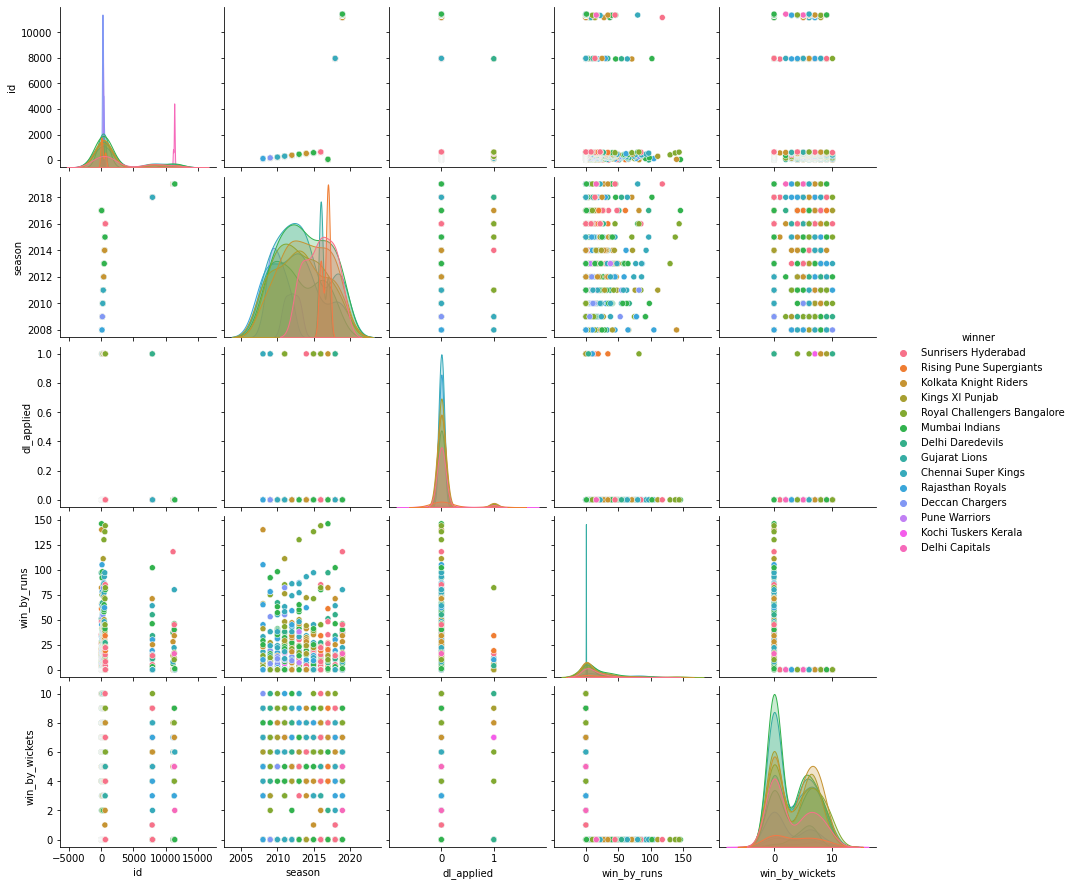

In [29]:
sns.pairplot(df1,hue="winner")

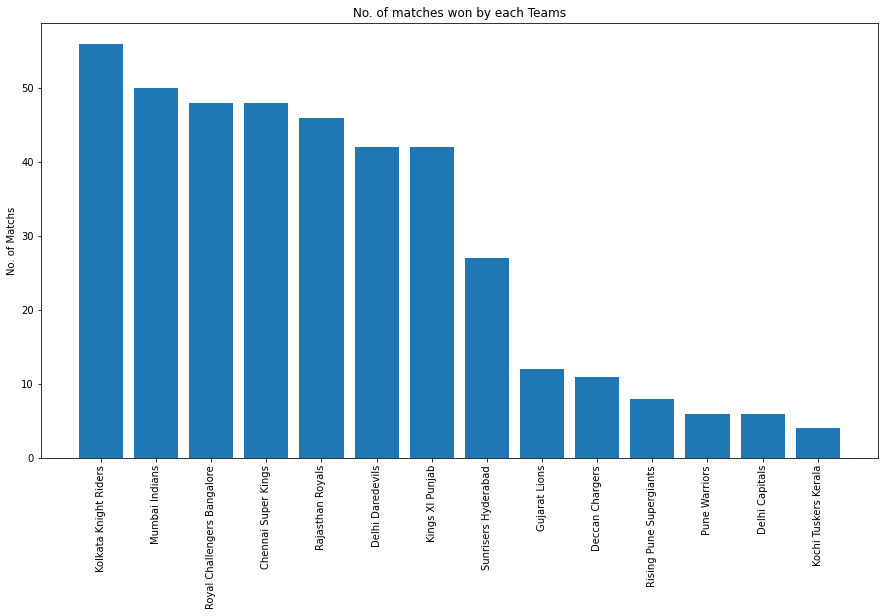

In [30]:
batting_second = df1[df1['win_by_wickets'] != 0]
batting_second['winner'].value_counts()
plt.figure(figsize = (15,8))
plt.bar(list(batting_second['winner'].value_counts().keys()), batting_second['winner'].value_counts())
plt.ylabel("No. of Matchs")
plt.title("No. of matches won by each Teams")
plt.xticks(rotation=90)
plt.show()


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

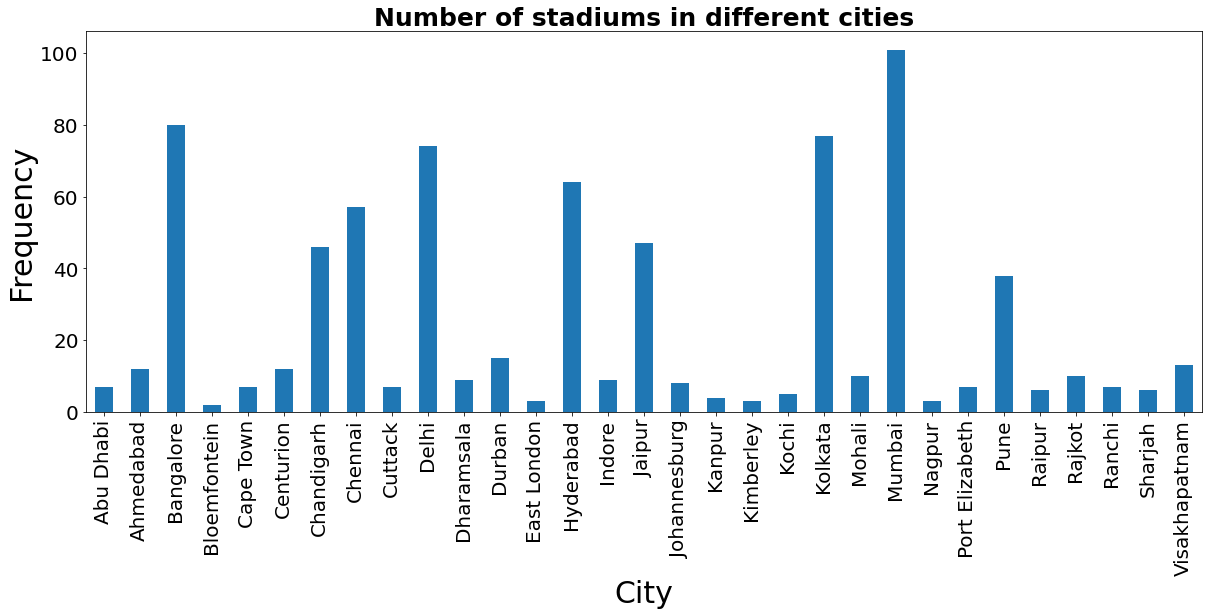

In [31]:
#Plotting venues along with cities 
v = pd.crosstab(df1['city'],df1['venue'])


#Adding a column by summing each columns
v['count'] = v.sum(axis = 'columns')
#We will just keep last column = 'count'
b = v['count']

#Plotting
plt.figure(figsize = (20,7))
b.plot(kind = 'bar')
plt.title("Number of stadiums in different cities", fontsize = 25, fontweight = 'bold')
plt.xlabel("City", size = 30)
plt.ylabel("Frequency", size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)

In [32]:
winning_teams = df1[['season','winner']]
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])
winners_of_IPL

,team
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(0, 1, 'Chennai Super Kings'),
  Text(0, 2, 'Kolkata Knight Riders'),
  Text(0, 3, 'Deccan Chargers'),
  Text(0, 4, 'Sunrisers Hyderabad'),
  Text(0, 5, 'Rajasthan Royals')])

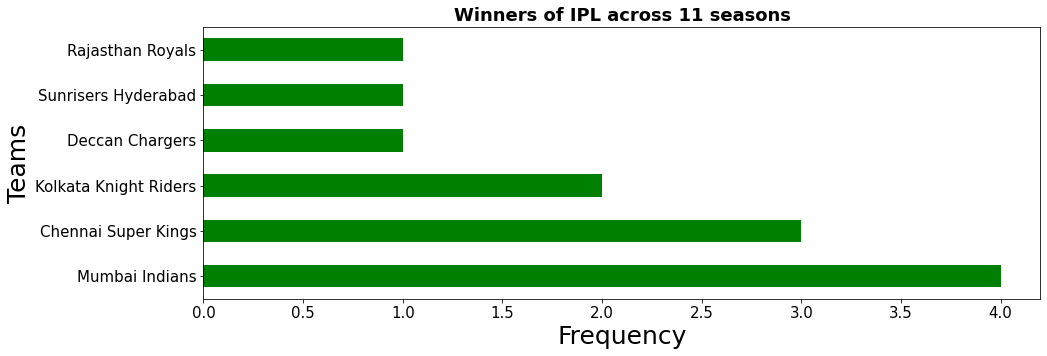

In [33]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'GREEN')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

##### MUMBAI INDIANS CLEARLY HAVE BAGGED MANY SEASON TROPHIES FOLLOWED BY CHENNAI SUPER KINGS AND KOLKATA KNIGHT RIDERS 

Text(0.5, 0, 'Frequency')

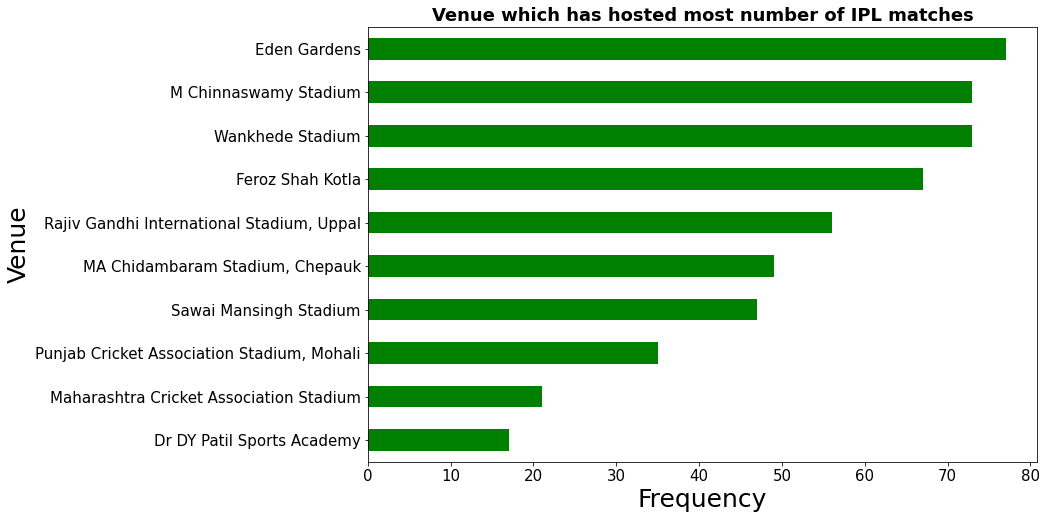

In [34]:
df1.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(12,8), fontsize=15, color='green')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 25)
plt.xlabel("Frequency", size = 25)

Text(0.5, 1.0, 'player of the  match award per player')

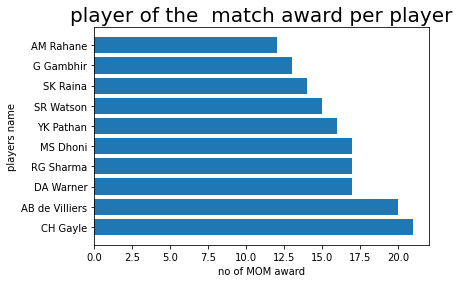

In [35]:
most_playerOfMatchAward=df1['player_of_match'].value_counts().reset_index()
plt.ticklabel_format(style='plain',axis='x',useOffset=False)
plt.barh(most_playerOfMatchAward['index'].head(10),most_playerOfMatchAward['player_of_match'].head(10))
plt.xlabel('no of MOM award')
plt.ylabel('players name')
plt.title('player of the  match award per player', fontsize=20)

##### CHRIS GAYLE AND AB DE VILLIERS WITH CLEAR MAJORITY HAVE WON THE MAXIMUM NUMBER OF MOM AWARDS COMPARED TO THE REST PLAYERS 

(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

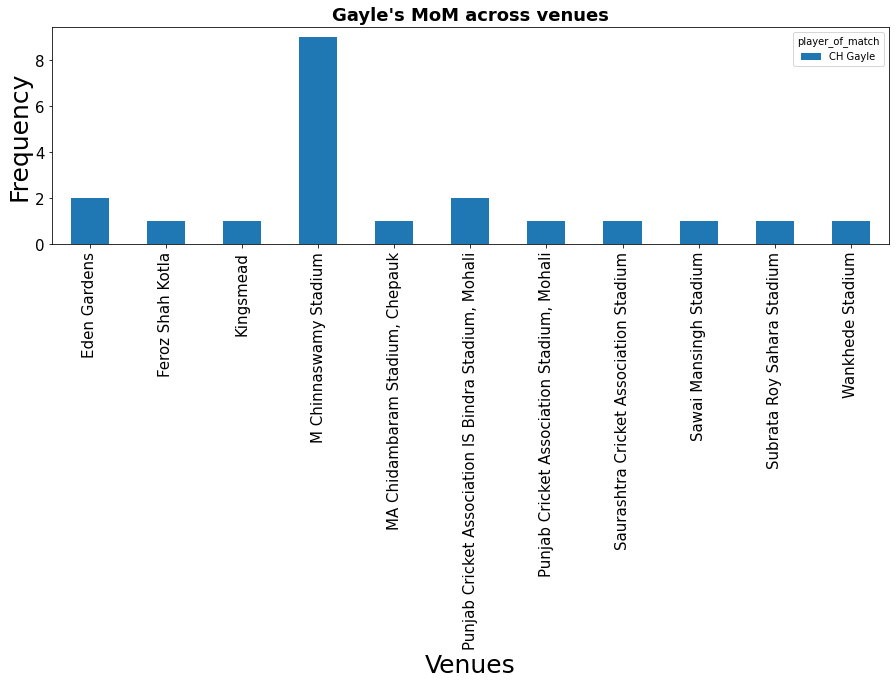

In [36]:
CH_Gayle = df1[df1['player_of_match']== 'CH Gayle'][['player_of_match','season','venue','city']]
CH_Gayle.groupby('venue')['player_of_match'].value_counts().sort_values(ascending = False)
CH_Gayle.groupby('venue')['player_of_match'].value_counts().unstack().plot(kind = 'bar', stacked = False, 
                                                                          figsize =(15,4),fontsize =15)
plt.title("Gayle's MoM across venues",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Venues", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

##### LOOKING AT THE NUMBER OF MOM AWARDS BAGGED BY GAYLE IN DIFFERENT STADIUMS ,WE CAN CLEARLY SEE M CHINNASWAMY STADIUM HAS DONE WONDERS TO HIM .
##### SO HAS HOME MATCH  WITH HUGE FANBASE HELPED HIM OR IS IT A MYTH ?

In [37]:
df2.dismissal_kind.value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [38]:
df2.fielder.value_counts()

MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
                 ... 
R Bishnoi           1
Sunny Singh         1
JM Kemp             1
N Pooran            1
R Salam             1
Name: fielder, Length: 499, dtype: int64

In [39]:
df2.batsman.value_counts()

V Kohli           4211
SK Raina          4044
RG Sharma         3816
S Dhawan          3776
G Gambhir         3524
                  ... 
S Kaushik            1
V Pratap Singh       1
U Kaul               1
K Ahmed              1
C Nanda              1
Name: batsman, Length: 516, dtype: int64

In [40]:
df2.bowler.value_counts()

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
                   ... 
AM Rahane             6
LPC Silva             6
SN Khan               2
SPD Smith             2
AC Gilchrist          1
Name: bowler, Length: 405, dtype: int64

In [41]:
df2.wide_runs.value_counts()

0    173673
1      4915
2       230
5       208
3        47
4         5
Name: wide_runs, dtype: int64

In [42]:
df2.bye_runs.value_counts()

0    178598
1       324
4       123
2        31
3         2
Name: bye_runs, dtype: int64

<AxesSubplot:>

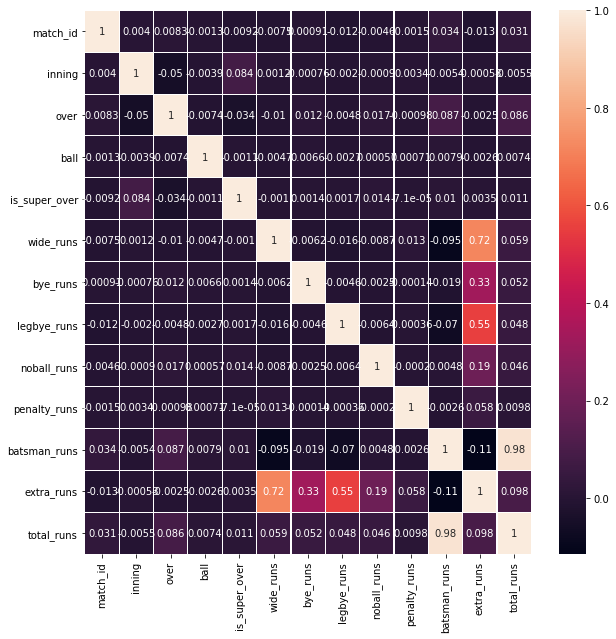

In [43]:
corr = df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=0.05)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

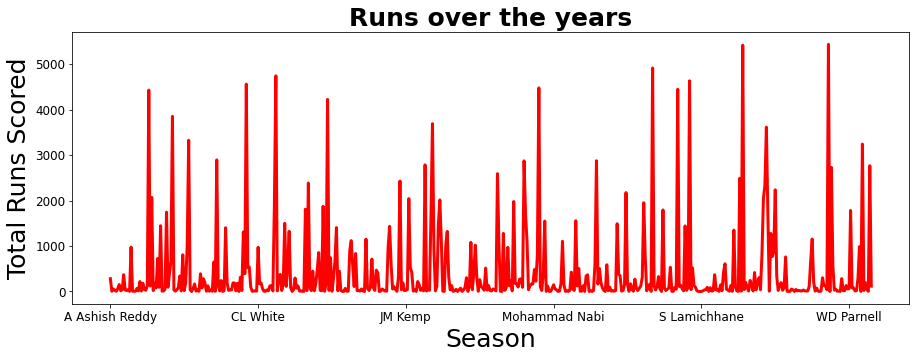

In [44]:
df2.groupby('batsman')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),
                                                                                             color = 'red')
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

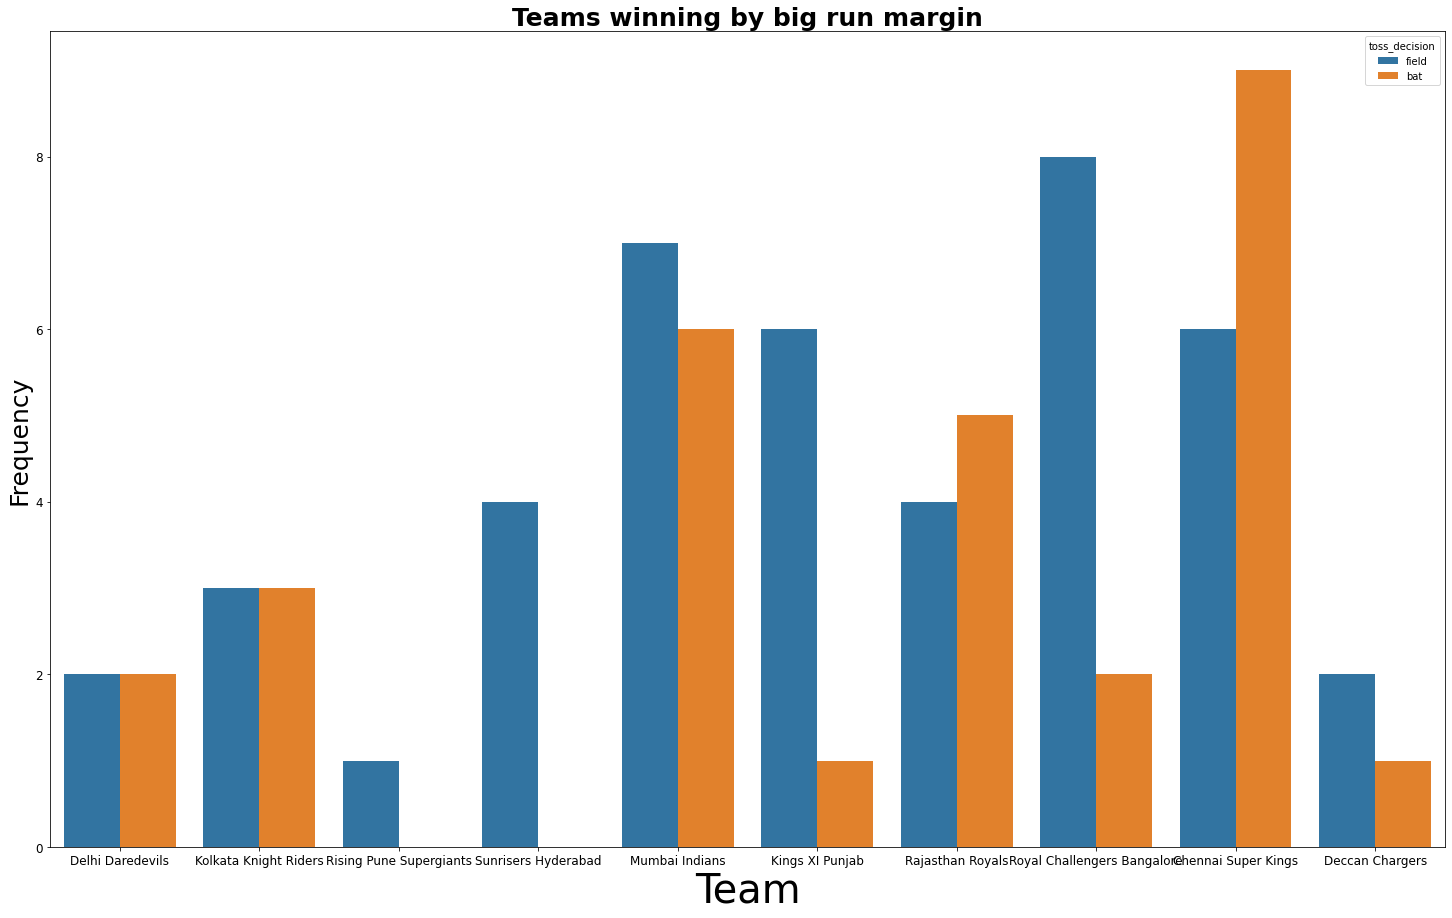

In [45]:
# Teams won matches by more than say 42 runs
big_run_margin = pd.DataFrame(df1[df1.win_by_runs > 42][['winner','toss_winner','toss_decision']])
plt.figure(figsize=(25,15))
sns.countplot('winner', data = big_run_margin, hue = 'toss_decision')
plt.title("Teams winning by big run margin",fontsize= 25, fontweight = 'bold')
plt.xlabel("Team", size = 40)
plt.ylabel("Frequency", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

##### CSK followed by RCB have won matches by more than say 42 runs by big run margins

C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 1800x720 with 0 Axes>

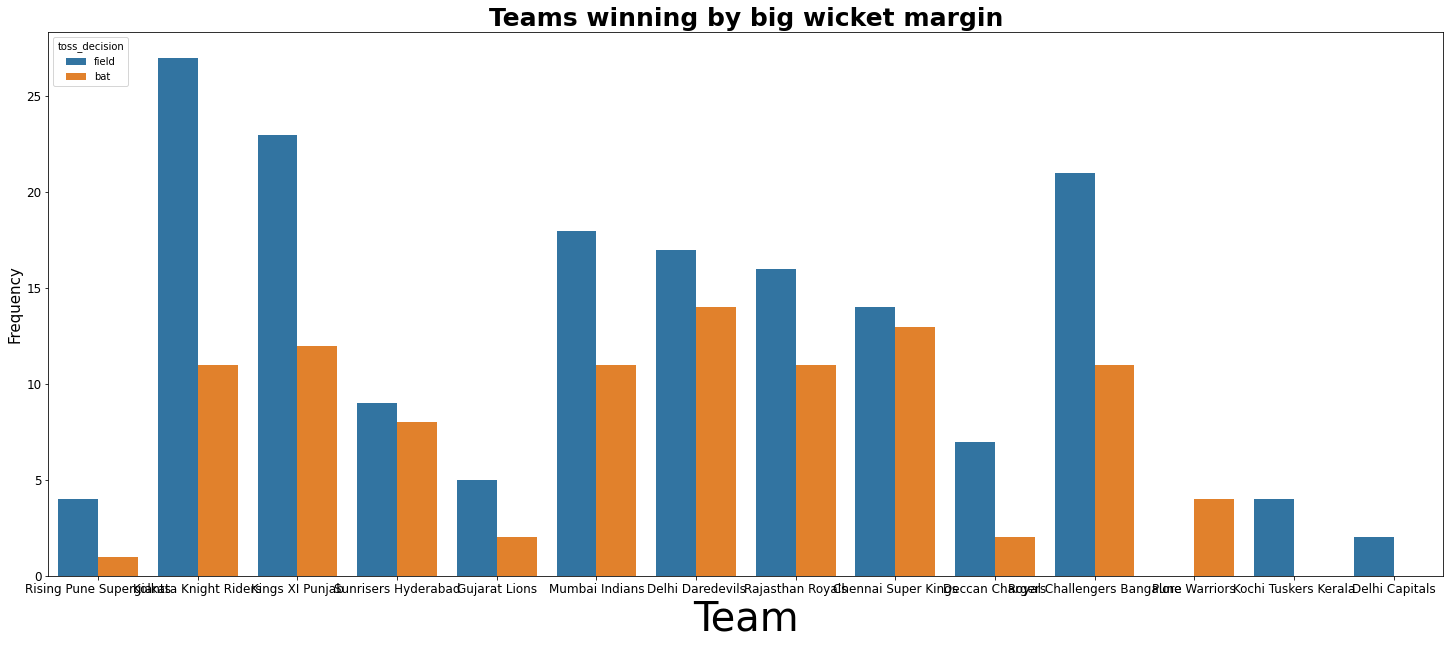

In [46]:
#Teams which have won matches by more than 5 wickets
big_wicket_margin = pd.DataFrame(df1[df1.win_by_wickets > 5][['winner','toss_winner','toss_decision']])
plt.figure(figsize=(25,10))
plt.figure(figsize=(25,10))
sns.countplot('winner', data = big_wicket_margin, hue='toss_decision')
plt.title("Teams winning by big wicket margin",fontsize= 25, fontweight = 'bold')
plt.xlabel("Team", size = 40)
plt.ylabel("Frequency", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

#### KKR team has won many matches with big wicket margin follwed by Kings XI Punjab and Royal Challengers Bangalore 

In [47]:
#merging the 2 datasets
merge_df = pd.merge(df2,df1, left_on='match_id', right_on ='id')
merge_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"


In [48]:
no_of_balls = pd.DataFrame(merge_df.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(merge_df.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge_df.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


#### We can list the top 3 batsman with highest strike rate as CH Gayle at the top , KA Pollard and DA Warner

In [49]:
wides = pd.DataFrame(merge_df.groupby('bowler')['wide_runs'].sum())
noballs = pd.DataFrame(merge_df.groupby('bowler')['noball_runs'].sum())
season = pd.DataFrame(merge_df.groupby('bowler')['season'].nunique())

extras_by_bowlers = pd.DataFrame({'wides':wides['wide_runs'],'no_balls':noballs['noball_runs']})
extras_by_bowlers.reset_index(inplace = True)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

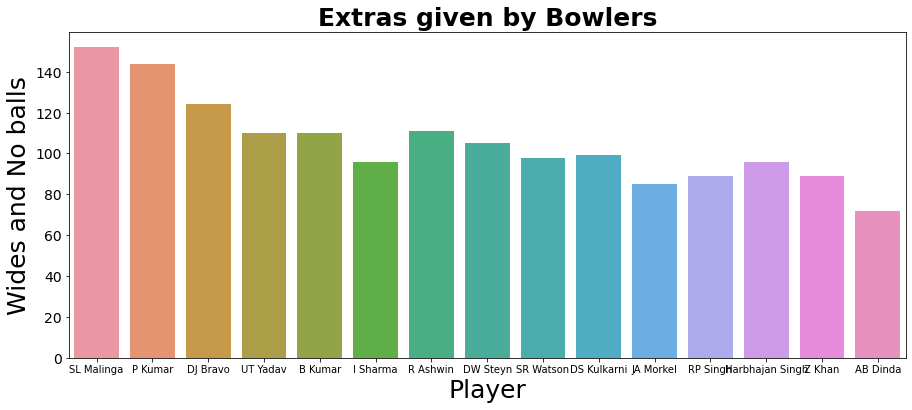

In [50]:
extras_by_bowlers['total_extras'] = extras_by_bowlers['wides'] + extras_by_bowlers['no_balls']
most_extras = extras_by_bowlers.sort_values(by='total_extras', ascending = False).head(15)
plt.figure(figsize = (15,6))
sns.barplot(x = 'bowler', y = 'wides', data = most_extras)
sns.barplot(x = 'bowler', y = 'no_balls', data = most_extras)
plt.title("Extras given by Bowlers",fontsize= 25, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Wides and No balls", size = 25)
plt.xticks(size = 10)
plt.yticks(size = 14)


#### THOUGH MALINGA HAS THE BEST AVERAGE , HE GIVES A LOT OF EXTRAS FOLLOWED BY P KUMAR AND Dj BRAVO 

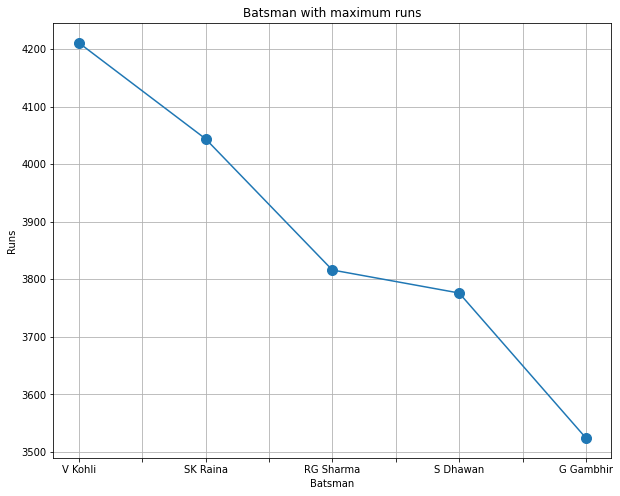

In [51]:
df2['batsman'].value_counts()[0:5].plot(kind ="line" ,figsize =(10,8), marker='o' ,markersize=10)
plt.title("Batsman with maximum runs")
plt.ylabel("Runs")
plt.xlabel("Batsman")
plt.grid(True)
plt.show()


#### SKIPPER VIRAT KOHLI HAS THE MAXIMUM NUMBER OF RUNS FOLLOWED  BY SURESH RAINA

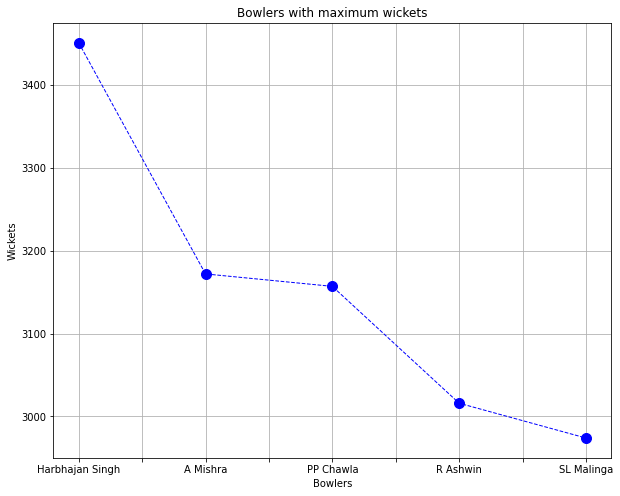

In [52]:
df2['bowler'].value_counts()[0:5].plot(kind ="line" ,figsize =(10,8), marker='o' ,markersize=10 ,color='blue',   
         linewidth=1.0,  
         linestyle='--' )
plt.title("Bowlers with maximum wickets")
plt.ylabel("Wickets")
plt.xlabel("Bowlers")
plt.grid(True)
plt.show()


#### HARBHAJAN SINGH IS THE HIGHEST WICKET TAKER FOLLOWED BY ASHISH MISHRA 

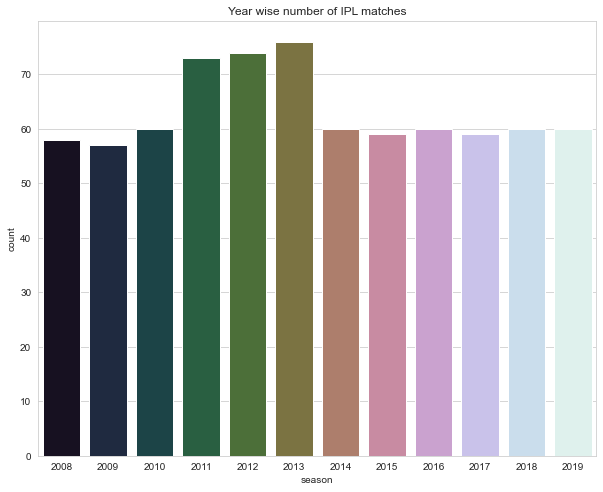

In [53]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Year wise number of IPL matches")
ax = sns.countplot(x="season", data=df1 ,palette="cubehelix")

## INSIGHTS:
1) The dataset contains 12 seasons of IPL from 2008-2019

2) Total no. of teams = 15 and the matches are held at 31 cities, 41 differeent stadiums 

3) Maximum number of matches were held at Mumbai followed by Bangalore. And Eden Gardens, Wankhede Stadium and M Chinnaswamy Stadium were the top 3 stadiums were most ipl matches were held

4) MUMBAI INDIANS has won the maximum number of matches followed by CSK , KKR and RCB

5) Winning the toss does play a inor role in team winning.

6) Major percentage of teams choose to filels first.

7) Mumbai Indians have bagged most of the ipl season trophies in the 11 seasons so far and then follwed by CSK and KKR

8) Chris Gayle and ABD have won most of the MOM awards with clear majority as compared to other players

9) Analysing Gayle's MOM awards across stadiums , clearly Cinnaswamy has played major roles due to huge fanbase

10) MS Dhoni , KD Karthik , RV Uthappa , SK Raina , AB de Villiers are top 5 popular fielders

11) V Kohli , SK Raina ,RG Sharma , S Dhawan ,G Gambhir are top 5 popular batsman

12) Harbhajan Singh , A Mishra , PP Chawla , R Ashwin , SL Malinga are top 5 popular bowlers

13) CSK followed by RCB have won matches by more than say 42 runs by big run margins. KKR team has won many matches with big wicket margin follwed by Kings XI Punjab and Royal Challengers Bangalore

14) We can list the top 3 batsman with highest strike rate as CH Gayle at the top , KA Pollard and DA Warner

15) Though Malinga has the best average , he gives a lot of extras followed by P Kumar and Dj Bravo

16) Skipper Virat Kohli has the maximum number of runs followed by Suresh Raina.

17) Harbhajan Singh is the highet wicket taker followed by A Mishra

18) Finally , over the years 2011-13 had most number of IPL matches where 2013 being at the peak

## CONCLUSION AND SOLUTION
1) As noticed in the dataset MI , CSK , KKR and RCB are the top teams.

2) Though RCB being exceptionally good at best players and maximum numbrr of matches won with great margins , still no result in the overall IPL season . Hence , auctions should be done with not just picking the best , instead picking the most consistent players.

3) MS Dhoni , KD Karthik , RV Uthappa , SK Raina , AB de Villiers are top 5 popular fielders
 V Kohli , SK Raina ,RG Sharma , S Dhawan ,G Gambhir are top 5 popular batsman
 Harbhajan Singh , A Mishra , PP Chawla , R Ashwin , SL Malinga are top 5 popular bowlers